In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
ls ~/somerville-ral-dummy-test/


data-dummy_data-lsst-backup.csv


In [138]:
df = pd.read_csv('~/somerville-ral-dummy-test/data-dummy_data-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_0.zip,2012224492,data/dummy_data/dummy_data/33/224/224.f|data/d...,37.0,13.151217,2025-09-23 19:11:42.278905,2025-09-23 19:11:55.430122
1,collated_3.zip,1976569607,data/dummy_data/dummy_data/33/124/124.f|data/d...,20.0,13.992435,2025-09-23 19:11:41.578960,2025-09-23 19:11:55.571395
2,collated_1.zip,1952454661,data/dummy_data/dummy_data/33/233/233.f|data/d...,32.0,18.227547,2025-09-23 19:11:40.308322,2025-09-23 19:11:58.535869
3,collated_2.zip,2055213727,data/dummy_data/dummy_data/33/212/212.f|data/d...,25.0,13.923560,2025-09-23 19:11:45.057962,2025-09-23 19:11:58.981522
4,collated_12.zip,1981813033,data/dummy_data/dummy_data/33/297/297.f|data/d...,23.0,13.956930,2025-09-23 19:12:01.746085,2025-09-23 19:12:15.703015
5,collated_5.zip,1940919183,data/dummy_data/dummy_data/33/362/362.f|data/d...,26.0,14.300958,2025-09-23 19:12:01.986745,2025-09-23 19:12:16.287703
6,collated_4.zip,2075136151,data/dummy_data/dummy_data/33/383/383.f|data/d...,22.0,18.319133,2025-09-23 19:12:00.614192,2025-09-23 19:12:18.933325
7,collated_9.zip,2130712578,data/dummy_data/dummy_data/33/343/343.f|data/d...,32.0,19.550351,2025-09-23 19:12:02.791692,2025-09-23 19:12:22.342043
8,collated_11.zip,2009076070,data/dummy_data/dummy_data/33/171/171.f|data/d...,23.0,20.284303,2025-09-23 19:12:04.945753,2025-09-23 19:12:25.230056
9,collated_6.zip,2079331549,data/dummy_data/dummy_data/33/80/80.f|data/dum...,28.0,20.886752,2025-09-23 19:12:04.740082,2025-09-23 19:12:25.626834


In [139]:
df['FILES_PER_ZIP'] = df['FILES_PER_ZIP'].fillna(0).astype(int)
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_0.zip,2012224492,data/dummy_data/dummy_data/33/224/224.f|data/d...,37,13.151217,2025-09-23 19:11:42.278905,2025-09-23 19:11:55.430122
1,collated_3.zip,1976569607,data/dummy_data/dummy_data/33/124/124.f|data/d...,20,13.992435,2025-09-23 19:11:41.578960,2025-09-23 19:11:55.571395
2,collated_1.zip,1952454661,data/dummy_data/dummy_data/33/233/233.f|data/d...,32,18.227547,2025-09-23 19:11:40.308322,2025-09-23 19:11:58.535869
3,collated_2.zip,2055213727,data/dummy_data/dummy_data/33/212/212.f|data/d...,25,13.923560,2025-09-23 19:11:45.057962,2025-09-23 19:11:58.981522
4,collated_12.zip,1981813033,data/dummy_data/dummy_data/33/297/297.f|data/d...,23,13.956930,2025-09-23 19:12:01.746085,2025-09-23 19:12:15.703015
5,collated_5.zip,1940919183,data/dummy_data/dummy_data/33/362/362.f|data/d...,26,14.300958,2025-09-23 19:12:01.986745,2025-09-23 19:12:16.287703
6,collated_4.zip,2075136151,data/dummy_data/dummy_data/33/383/383.f|data/d...,22,18.319133,2025-09-23 19:12:00.614192,2025-09-23 19:12:18.933325
7,collated_9.zip,2130712578,data/dummy_data/dummy_data/33/343/343.f|data/d...,32,19.550351,2025-09-23 19:12:02.791692,2025-09-23 19:12:22.342043
8,collated_11.zip,2009076070,data/dummy_data/dummy_data/33/171/171.f|data/d...,23,20.284303,2025-09-23 19:12:04.945753,2025-09-23 19:12:25.230056
9,collated_6.zip,2079331549,data/dummy_data/dummy_data/33/80/80.f|data/dum...,28,20.886752,2025-09-23 19:12:04.740082,2025-09-23 19:12:25.626834


In [140]:
df['FILES_PER_ZIP'] = df['FILES_PER_ZIP'].astype('Int64')
df['UPLOAD_END'] = pd.to_datetime(df['UPLOAD_END'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['UPLOAD_START'] = pd.to_datetime(df['UPLOAD_START'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['FILE_SIZE'] = df['FILE_SIZE'].astype('Int64')
df = df.dropna(subset=['UPLOAD_END', 'UPLOAD_START', 'FILE_SIZE'])
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_0.zip,2012224492,data/dummy_data/dummy_data/33/224/224.f|data/d...,37,13.151217,2025-09-23 19:11:42.278905,2025-09-23 19:11:55.430122
1,collated_3.zip,1976569607,data/dummy_data/dummy_data/33/124/124.f|data/d...,20,13.992435,2025-09-23 19:11:41.578960,2025-09-23 19:11:55.571395
2,collated_1.zip,1952454661,data/dummy_data/dummy_data/33/233/233.f|data/d...,32,18.227547,2025-09-23 19:11:40.308322,2025-09-23 19:11:58.535869
3,collated_2.zip,2055213727,data/dummy_data/dummy_data/33/212/212.f|data/d...,25,13.923560,2025-09-23 19:11:45.057962,2025-09-23 19:11:58.981522
4,collated_12.zip,1981813033,data/dummy_data/dummy_data/33/297/297.f|data/d...,23,13.956930,2025-09-23 19:12:01.746085,2025-09-23 19:12:15.703015
5,collated_5.zip,1940919183,data/dummy_data/dummy_data/33/362/362.f|data/d...,26,14.300958,2025-09-23 19:12:01.986745,2025-09-23 19:12:16.287703
6,collated_4.zip,2075136151,data/dummy_data/dummy_data/33/383/383.f|data/d...,22,18.319133,2025-09-23 19:12:00.614192,2025-09-23 19:12:18.933325
7,collated_9.zip,2130712578,data/dummy_data/dummy_data/33/343/343.f|data/d...,32,19.550351,2025-09-23 19:12:02.791692,2025-09-23 19:12:22.342043
8,collated_11.zip,2009076070,data/dummy_data/dummy_data/33/171/171.f|data/d...,23,20.284303,2025-09-23 19:12:04.945753,2025-09-23 19:12:25.230056
9,collated_6.zip,2079331549,data/dummy_data/dummy_data/33/80/80.f|data/dum...,28,20.886752,2025-09-23 19:12:04.740082,2025-09-23 19:12:25.626834


In [141]:
df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']
df[df['OVERLAP'] == False]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
0,collated_0.zip,2012224492,data/dummy_data/dummy_data/33/224/224.f|data/d...,37,13.151217,2025-09-23 19:11:42.278905,2025-09-23 19:11:55.430122,False
4,collated_12.zip,1981813033,data/dummy_data/dummy_data/33/297/297.f|data/d...,23,13.956930,2025-09-23 19:12:01.746085,2025-09-23 19:12:15.703015,False
20,collated_21.zip,2090864175,data/dummy_data/dummy_data/33/163/163.f|data/d...,19,14.010973,2025-09-23 19:13:02.594073,2025-09-23 19:13:16.605046,False
33,/data/dummy_data/60/1/1.f,1584398336,NaN,0,22.829375,2025-09-23 19:13:59.446552,2025-09-23 19:14:22.275927,False


In [142]:
df[df['OVERLAP'] == True]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
1,collated_3.zip,1976569607,data/dummy_data/dummy_data/33/124/124.f|data/d...,20,13.992435,2025-09-23 19:11:41.578960,2025-09-23 19:11:55.571395,True
2,collated_1.zip,1952454661,data/dummy_data/dummy_data/33/233/233.f|data/d...,32,18.227547,2025-09-23 19:11:40.308322,2025-09-23 19:11:58.535869,True
3,collated_2.zip,2055213727,data/dummy_data/dummy_data/33/212/212.f|data/d...,25,13.923560,2025-09-23 19:11:45.057962,2025-09-23 19:11:58.981522,True
5,collated_5.zip,1940919183,data/dummy_data/dummy_data/33/362/362.f|data/d...,26,14.300958,2025-09-23 19:12:01.986745,2025-09-23 19:12:16.287703,True
6,collated_4.zip,2075136151,data/dummy_data/dummy_data/33/383/383.f|data/d...,22,18.319133,2025-09-23 19:12:00.614192,2025-09-23 19:12:18.933325,True
7,collated_9.zip,2130712578,data/dummy_data/dummy_data/33/343/343.f|data/d...,32,19.550351,2025-09-23 19:12:02.791692,2025-09-23 19:12:22.342043,True
8,collated_11.zip,2009076070,data/dummy_data/dummy_data/33/171/171.f|data/d...,23,20.284303,2025-09-23 19:12:04.945753,2025-09-23 19:12:25.230056,True
9,collated_6.zip,2079331549,data/dummy_data/dummy_data/33/80/80.f|data/dum...,28,20.886752,2025-09-23 19:12:04.740082,2025-09-23 19:12:25.626834,True
10,collated_7.zip,2052069615,data/dummy_data/dummy_data/33/198/198.f|data/d...,33,21.992939,2025-09-23 19:12:05.438463,2025-09-23 19:12:27.431402,True
11,collated_10.zip,2109739268,data/dummy_data/dummy_data/33/98/98.f|data/dum...,23,16.373812,2025-09-23 19:12:12.367182,2025-09-23 19:12:28.740994,True


In [143]:
df = df.drop(columns=['ZIP_CONTENTS'])

In [144]:
print(f'Instances of overlap: {df["OVERLAP"].sum()} vs instanses of no overlap: {(~df["OVERLAP"]).sum()}')

Instances of overlap: 46 vs instanses of no overlap: 4


In [145]:
df['TYPE'] = df['LOCAL_PATH'].apply(lambda x: 'zip' if x.endswith('.zip') else 'file')
df.drop(columns=['LOCAL_PATH'], inplace=True)
df

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE
0,2012224492,37,13.151217,2025-09-23 19:11:42.278905,2025-09-23 19:11:55.430122,False,zip
1,1976569607,20,13.992435,2025-09-23 19:11:41.578960,2025-09-23 19:11:55.571395,True,zip
2,1952454661,32,18.227547,2025-09-23 19:11:40.308322,2025-09-23 19:11:58.535869,True,zip
3,2055213727,25,13.923560,2025-09-23 19:11:45.057962,2025-09-23 19:11:58.981522,True,zip
4,1981813033,23,13.956930,2025-09-23 19:12:01.746085,2025-09-23 19:12:15.703015,False,zip
5,1940919183,26,14.300958,2025-09-23 19:12:01.986745,2025-09-23 19:12:16.287703,True,zip
6,2075136151,22,18.319133,2025-09-23 19:12:00.614192,2025-09-23 19:12:18.933325,True,zip
7,2130712578,32,19.550351,2025-09-23 19:12:02.791692,2025-09-23 19:12:22.342043,True,zip
8,2009076070,23,20.284303,2025-09-23 19:12:04.945753,2025-09-23 19:12:25.230056,True,zip
9,2079331549,28,20.886752,2025-09-23 19:12:04.740082,2025-09-23 19:12:25.626834,True,zip


In [146]:
df

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE
0,2012224492,37,13.151217,2025-09-23 19:11:42.278905,2025-09-23 19:11:55.430122,False,zip
1,1976569607,20,13.992435,2025-09-23 19:11:41.578960,2025-09-23 19:11:55.571395,True,zip
2,1952454661,32,18.227547,2025-09-23 19:11:40.308322,2025-09-23 19:11:58.535869,True,zip
3,2055213727,25,13.923560,2025-09-23 19:11:45.057962,2025-09-23 19:11:58.981522,True,zip
4,1981813033,23,13.956930,2025-09-23 19:12:01.746085,2025-09-23 19:12:15.703015,False,zip
5,1940919183,26,14.300958,2025-09-23 19:12:01.986745,2025-09-23 19:12:16.287703,True,zip
6,2075136151,22,18.319133,2025-09-23 19:12:00.614192,2025-09-23 19:12:18.933325,True,zip
7,2130712578,32,19.550351,2025-09-23 19:12:02.791692,2025-09-23 19:12:22.342043,True,zip
8,2009076070,23,20.284303,2025-09-23 19:12:04.945753,2025-09-23 19:12:25.230056,True,zip
9,2079331549,28,20.886752,2025-09-23 19:12:04.740082,2025-09-23 19:12:25.626834,True,zip


In [147]:
len(df[df['TYPE'] == 'zip']), len(df[df['TYPE'] == 'file'])

(32, 18)

In [148]:
zip_upload_time = df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum()
zip_upload_time

572.2657839999999

In [149]:
print(f"Total upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Avergage number of files per zip: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].mean():.2f}")
print(f"Total files in zips: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.0f}")
print(f"Average upload time per file in zips: {zip_upload_time / df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.2f} seconds")
print(f"Total upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Total upload time: {df['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time: {df['UPLOAD_TIME'].mean():.2f} seconds")

Total upload time for zip files: 572 seconds
Average upload time for zip files: 17.88 seconds
Avergage number of files per zip: 26.06
Total files in zips: 834
Average upload time per file in zips: 0.69 seconds
Total upload time for file uploads: 1457 seconds
Average upload time for file uploads: 80.93 seconds
Total upload time: 2029 seconds
Average upload time: 40.58 seconds


In [150]:
zip_total_size = df[df['TYPE'] == 'zip']['FILE_SIZE'].sum()
zip_total_size / (1024 * 1024 * 1024)

61.30190719012171

In [151]:
file_total_size = df[df['TYPE'] == 'file']['FILE_SIZE'].sum()
file_total_size / (1024 * 1024 * 1024)

89.4755859375

In [152]:
print(f"Zip file size stats (MB):")
print(df[df['TYPE'] == 'zip']['FILE_SIZE'].describe() / (1024 * 1024))

Zip file size stats (MB):
count       0.000031
mean      1961.66103
std         57.37231
min       1850.00549
25%      1918.256175
50%      1977.003863
75%      1999.254454
max      2046.004052
Name: FILE_SIZE, dtype: Float64


In [153]:
print(f"File size stats (MB):")
print(df[df['TYPE'] == 'file']['FILE_SIZE'].describe() / (1024 * 1024))

File size stats (MB):
count       0.000017
mean     5090.166667
std      2878.227932
min           1511.0
25%          2369.75
50%           4061.5
75%          7975.75
max           9478.0
Name: FILE_SIZE, dtype: Float64


In [154]:
df['TRANSFER_RATE'] = df['FILE_SIZE'] / df['UPLOAD_TIME'] * 8 / (1024**3)
print(f"Transfer rate stats (Gb/s):")
df['TRANSFER_RATE'].describe()

Transfer rate stats (Gb/s):


count        50.0
mean     0.747078
std      0.234055
min       0.45276
25%      0.509625
50%      0.739837
75%      0.905879
max       1.17557
Name: TRANSFER_RATE, dtype: Float64

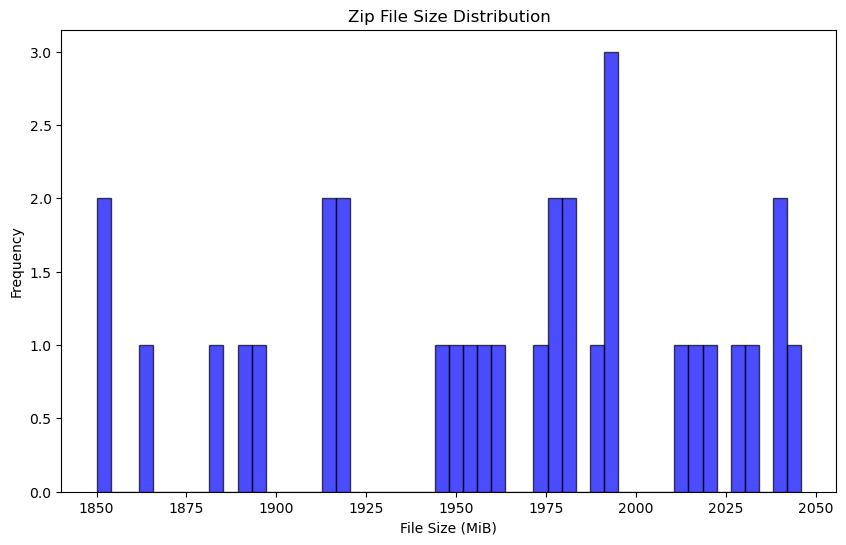

In [155]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

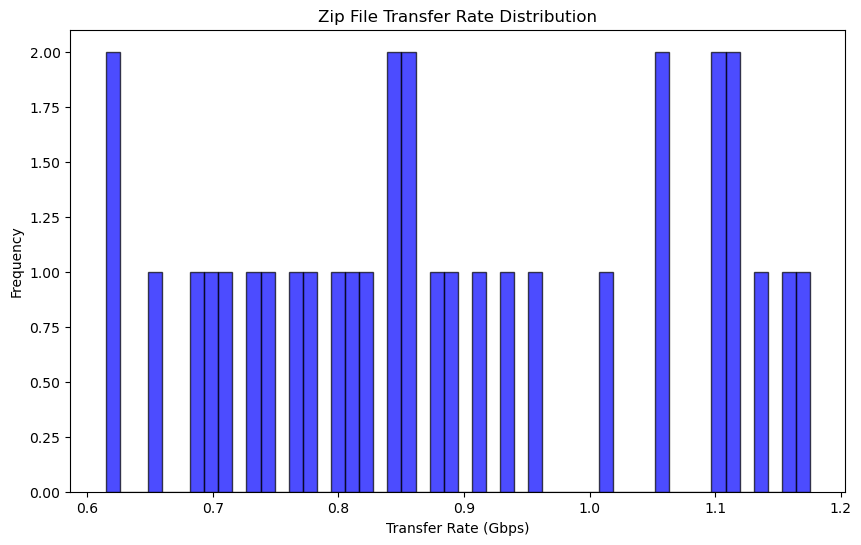

In [156]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

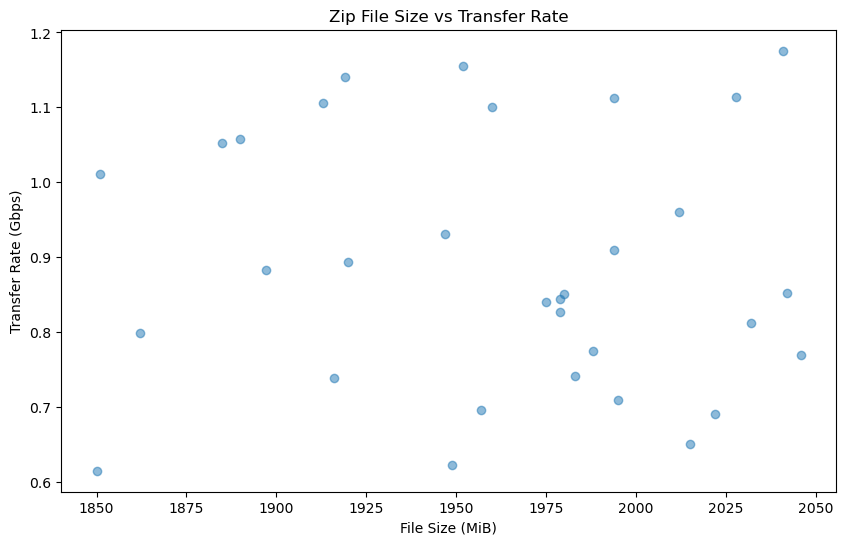

In [157]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'zip']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'zip']['TRANSFER_RATE'], alpha=0.5)
plt.title('Zip File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

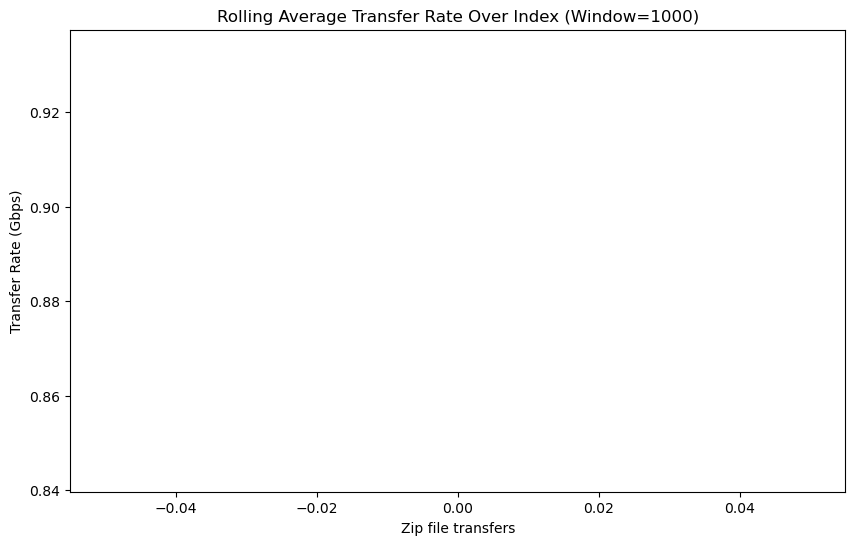

In [158]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'zip']['TRANSFER_RATE'].mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('Zip file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

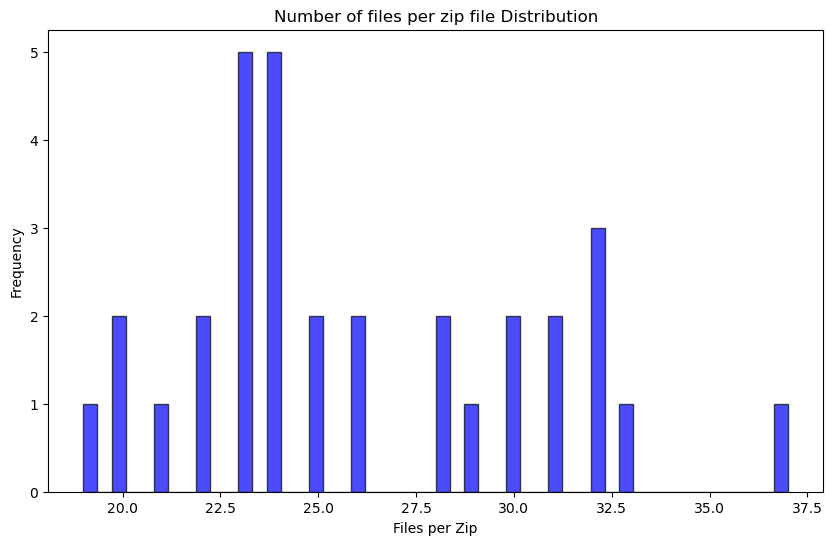

In [159]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILES_PER_ZIP'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Number of files per zip file Distribution')
plt.xlabel('Files per Zip')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

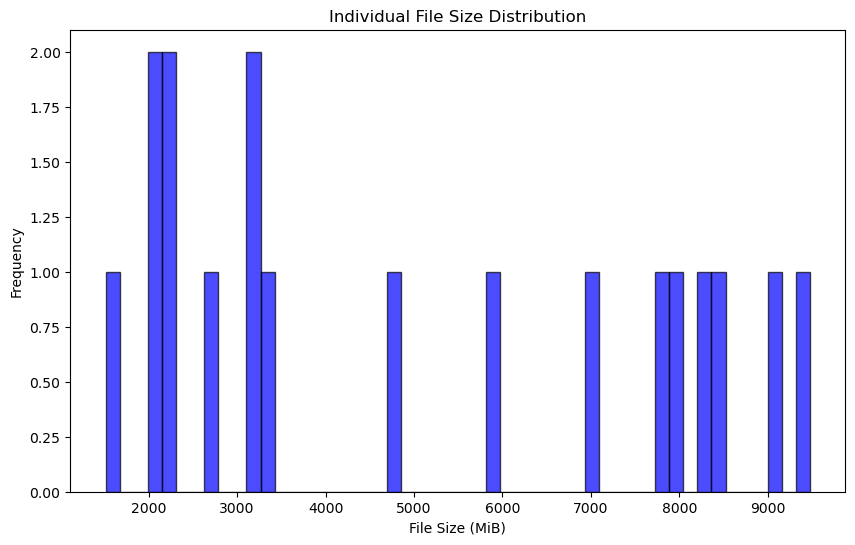

In [160]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

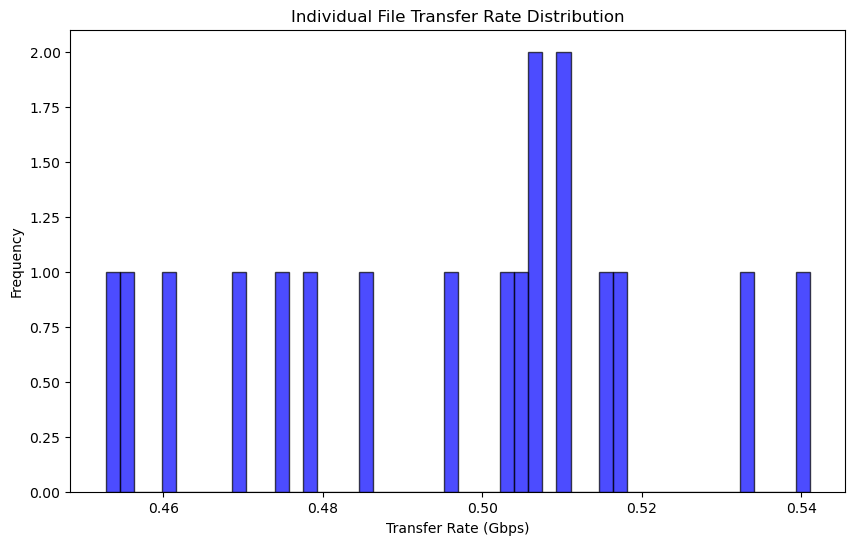

In [161]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

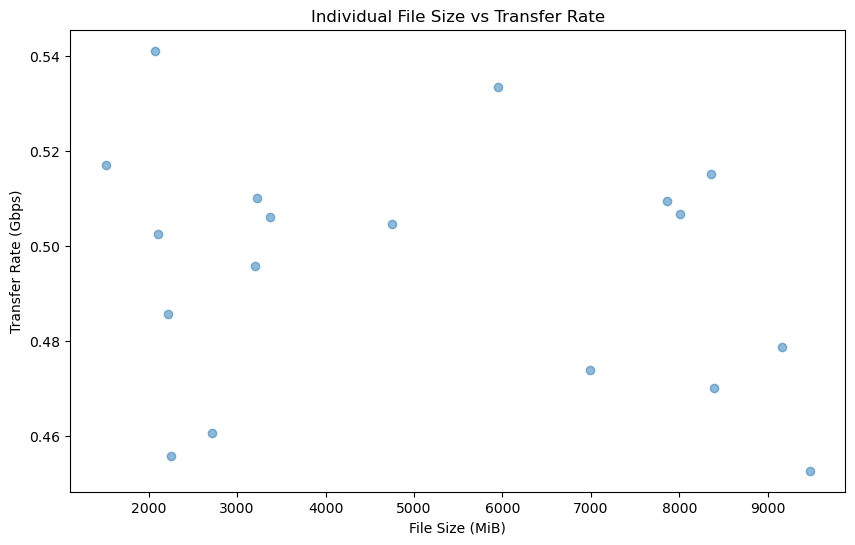

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'file']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'file']['TRANSFER_RATE'], alpha=0.5)
plt.title('Individual File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

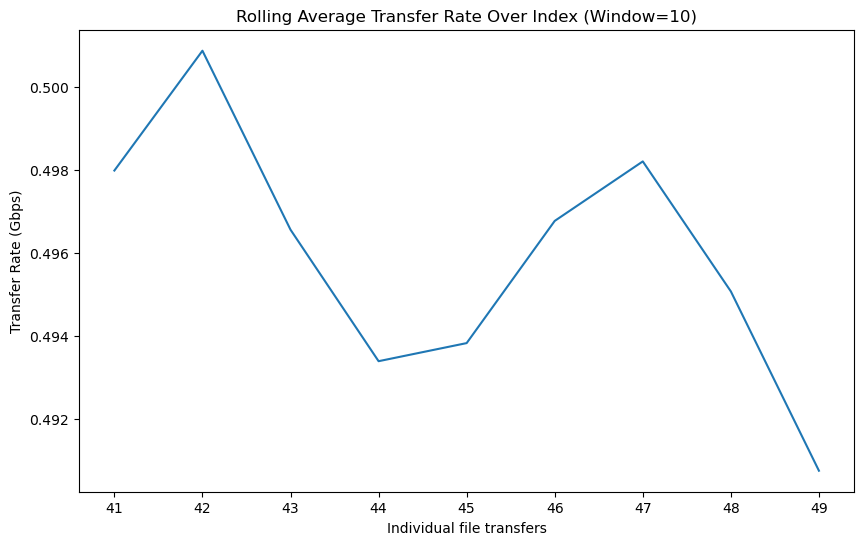

In [163]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'file']['TRANSFER_RATE'].rolling(window=10).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=10)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('Individual file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

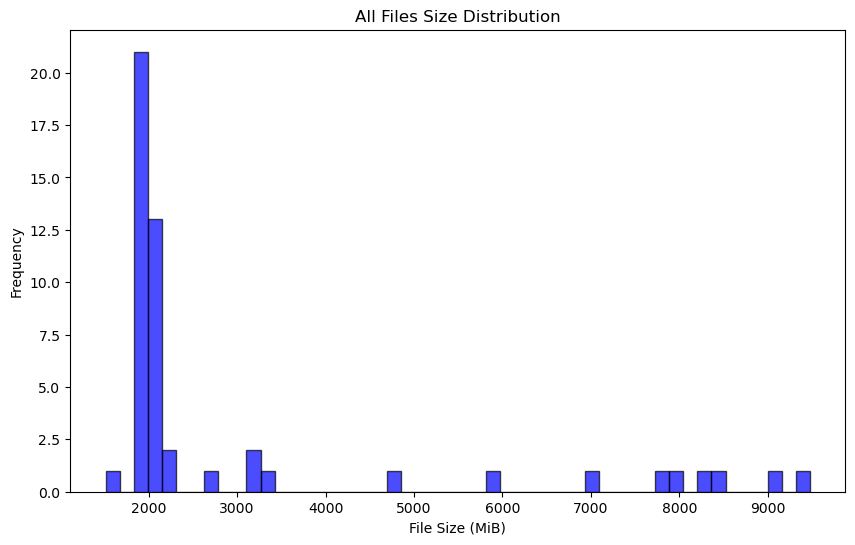

In [164]:
plt.figure(figsize=(10, 6))
plt.hist(df['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

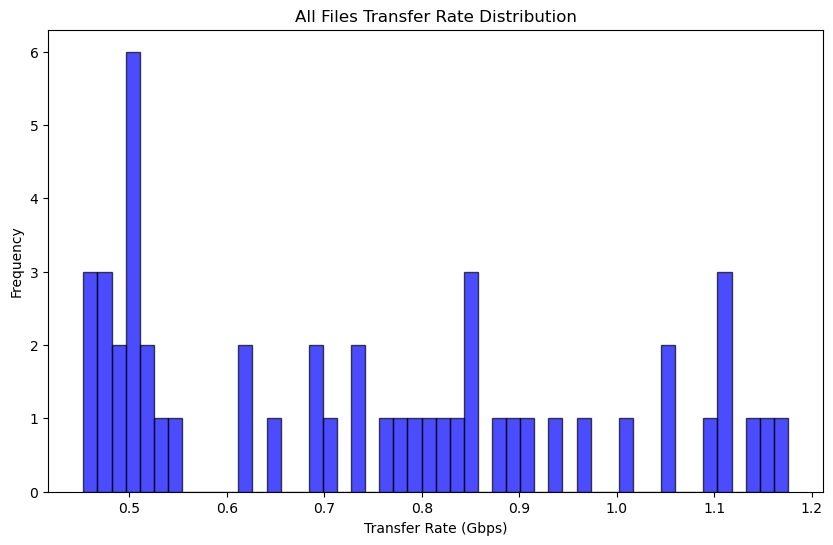

In [165]:
plt.figure(figsize=(10, 6))
plt.hist(df['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

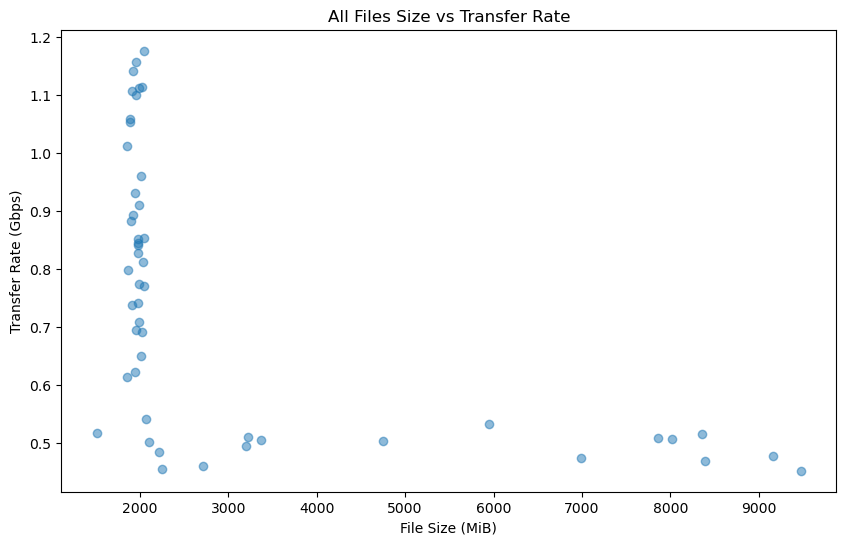

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FILE_SIZE'] / 1024**2, df['TRANSFER_RATE'], alpha=0.5)
plt.title('All Files Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

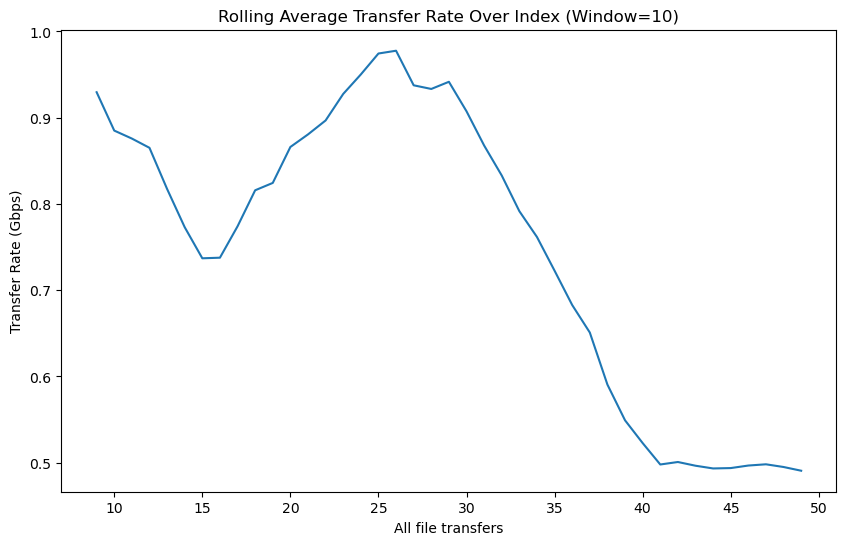

In [167]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df['TRANSFER_RATE'].rolling(window=10).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=10)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('All file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

In [168]:
df[~df['OVERLAP']]

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE,TRANSFER_RATE
0,2012224492,37,13.151217,2025-09-23 19:11:42.278905,2025-09-23 19:11:55.430122,False,zip,1.139989
4,1981813033,23,13.956930,2025-09-23 19:12:01.746085,2025-09-23 19:12:15.703015,False,zip,1.057945
20,2090864175,19,14.010973,2025-09-23 19:13:02.594073,2025-09-23 19:13:16.605046,False,zip,1.111854
33,1584398336,0,22.829375,2025-09-23 19:13:59.446552,2025-09-23 19:14:22.275927,False,file,0.517083


In [169]:
import numpy as np
from dask import dataframe as dd
from distributed import Client
client = Client()
print(client.dashboard_link)
df = df.sort_values(by='UPLOAD_START').reset_index(drop=True)
client.scatter(df)
print("sorted df")
print("from pandas df to dask ddf")
ddf = dd.from_pandas(df, npartitions=100)
# --- 1. Data Preparation ---
# Ensure datetime types for accurate calculations
# ddf['UPLOAD_START'] = dd.to_datetime(ddf['UPLOAD_START'])
# ddf['UPLOAD_END'] = dd.to_datetime(ddf['UPLOAD_END'])

# Sort by upload start time to process events chronologically
# --- 2. Create an Event Timeline ---
# Create a list of "events": the start and end of each transfer.
# At each start, the total network rate increases. At each end, it decreases.
def gen_events(row):
    events = []
    if pd.notna(row['TRANSFER_RATE']) and row['TRANSFER_RATE'] > 0:
        events.append({'time': row['UPLOAD_START'], 'rate_change': row['TRANSFER_RATE']})
        events.append({'time': row['UPLOAD_END'], 'rate_change': -row['TRANSFER_RATE']})
    # return pd.DataFrame(events).sort_values(by='time').reset_index(drop=True)
    return events

def process_partition(partition):
    # Apply the function to each row to get a list of lists of dictionaries
    list_of_events = partition.apply(gen_events, axis=1).sum()
    # If no events were generated in this partition, return an empty DataFrame
    if not list_of_events:
        return pd.DataFrame({'time': pd.Series(dtype='datetime64[ns]'), 'rate_change': pd.Series(dtype='float64')})
    # Convert the list of events into a single DataFrame for the partition
    return pd.DataFrame(list_of_events)

events_ddf = ddf.map_partitions(
    process_partition,
    meta={'time': 'datetime64[ns]', 'rate_change': 'float64'}
).dropna().reset_index(drop=True)
print("set up events_ddf")
# Convert the list of events to a DataFrame and sort chronologically
events_df = events_ddf.compute().sort_values(by='time').reset_index(drop=True)
events_df['time'] = pd.to_datetime(events_df['time'])
print("computed events_df")
# --- 3. Calculate Throughput Over Time ---
# Iterate through the timeline, calculating the total data transferred during each interval
# between events. During each interval, the total transfer rate is constant.
total_data_transferred_gb = 0
current_rate_gbps = 0
print("starting loop over events_df")
for i in range(len(events_df) - 1):
    # Update the current total rate with the change from the current event
    current_rate_gbps += events_df.loc[i, 'rate_change']
    
    # Calculate the duration of the current interval (until the next event)
    start_interval = events_df.loc[i, 'time']
    end_interval = events_df.loc[i + 1, 'time']
    duration_seconds = (end_interval - start_interval).total_seconds()
    
    # If there is time between events, calculate data transferred and add to total
    if duration_seconds > 0:
        # Data = Rate (Gbps) * Time (s) -> gives Gigabits
        data_in_interval_gb = current_rate_gbps * duration_seconds
        total_data_transferred_gb += data_in_interval_gb

# --- 4. Calculate Final Results ---
# Total time from the first upload start to the last upload end
total_duration_seconds = (events_df['time'].max() - events_df['time'].min()).total_seconds()

# The overall average network speed is the total data transferred divided by the total time
if total_duration_seconds > 0:
    estimated_total_speed_gbps = total_data_transferred_gb / total_duration_seconds
else:
    estimated_total_speed_gbps = 0

print(f"Total duration of all transfers: {total_duration_seconds:.2f} seconds")
print(f"Total data transferred (accounting for overlaps): {total_data_transferred_gb / 8:.2f} GiB")
print(f"Estimated average total network speed: {estimated_total_speed_gbps:.2f} Gbps")

/home/dave/miniconda3/envs/lsst-uk/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45331 instead
  warnings.warn(


http://127.0.0.1:45331/status
sorted df
from pandas df to dask ddf
set up events_ddf
computed events_df
starting loop over events_df
Total duration of all transfers: 302.67 seconds
Total data transferred (accounting for overlaps): 150.78 GiB
Estimated average total network speed: 3.99 Gbps


In [170]:
# Verify average
print(f"{(df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds():.2f} s, {df['FILE_SIZE'].sum() / (1024**3):.2f} GiB, {df['FILE_SIZE'].sum() * 8 / (1024**3) / ((df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds()):.2f} Gbps")

302.67 s, 150.78 GiB, 3.99 Gbps


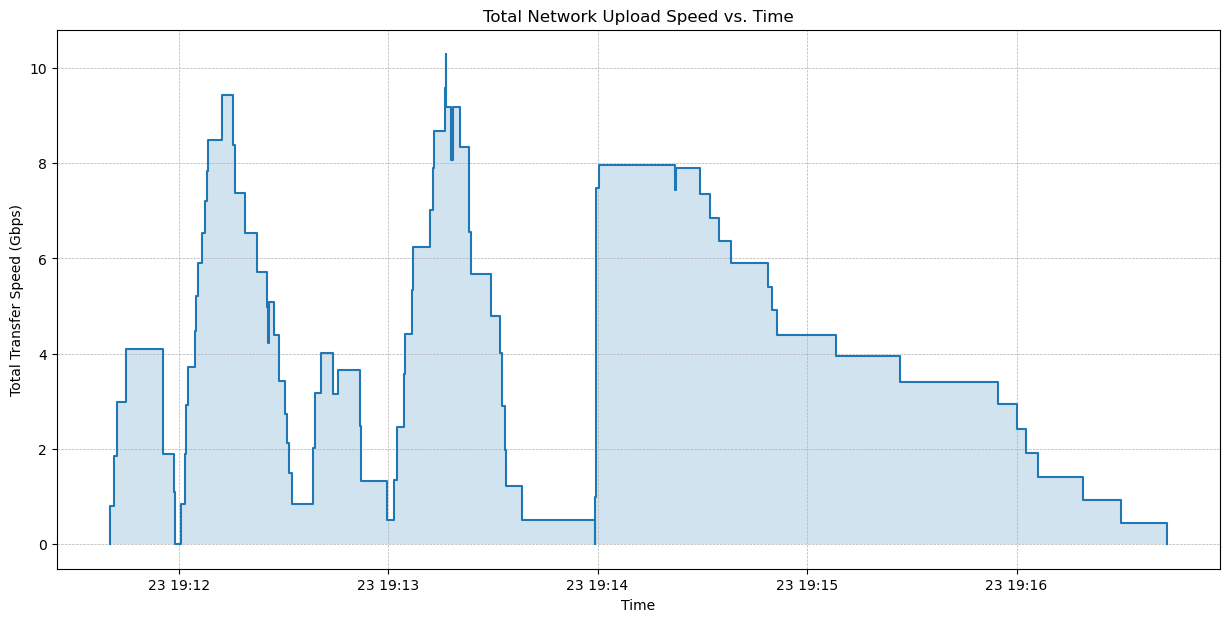

In [171]:
# --- 5. Plot Total Throughput Over Time ---

# Calculate the cumulative sum of rate changes to get the total network speed at any given time.
events_df['total_rate'] = events_df['rate_change'].cumsum()

# Prepare data for a step plot to accurately visualize the changes.
# We need to create pairs of points to draw horizontal lines.
plot_times = []
plot_rates = []
# Start the plot at a rate of 0 just before the first event.
plot_times.append(events_df['time'].iloc[0])
plot_rates.append(0)

for i in range(len(events_df) - 1):
    # Add a point at the beginning of the interval with the new rate
    plot_times.append(events_df['time'].iloc[i])
    plot_rates.append(events_df['total_rate'].iloc[i])
    # Add a point at the end of the interval with the same rate to create the horizontal step
    plot_times.append(events_df['time'].iloc[i+1])
    plot_rates.append(events_df['total_rate'].iloc[i])

# Add the final point
plot_times.append(events_df['time'].iloc[-1])
plot_rates.append(events_df['total_rate'].iloc[-1])


# Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(plot_times, plot_rates)
plt.title('Total Network Upload Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Transfer Speed (Gbps)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.fill_between(plot_times, plot_rates, alpha=0.2)
plt.show()

In [172]:
events_df

,time,rate_change,total_rate
0,2025-09-23 19:11:40.308322,0.798073,7.980734e-01
1,2025-09-23 19:11:41.578960,1.052468,1.850541e+00
2,2025-09-23 19:11:42.278905,1.139989,2.990530e+00
3,2025-09-23 19:11:45.057962,1.099757,4.090288e+00
4,2025-09-23 19:11:55.430122,-1.139989,2.950299e+00
...,...,...,...
95,2025-09-23 19:16:02.658050,-0.506804,1.916823e+00
96,2025-09-23 19:16:06.133598,-0.515098,1.401725e+00
97,2025-09-23 19:16:18.879283,-0.470165,9.315599e-01
98,2025-09-23 19:16:29.834682,-0.478800,4.527599e-01


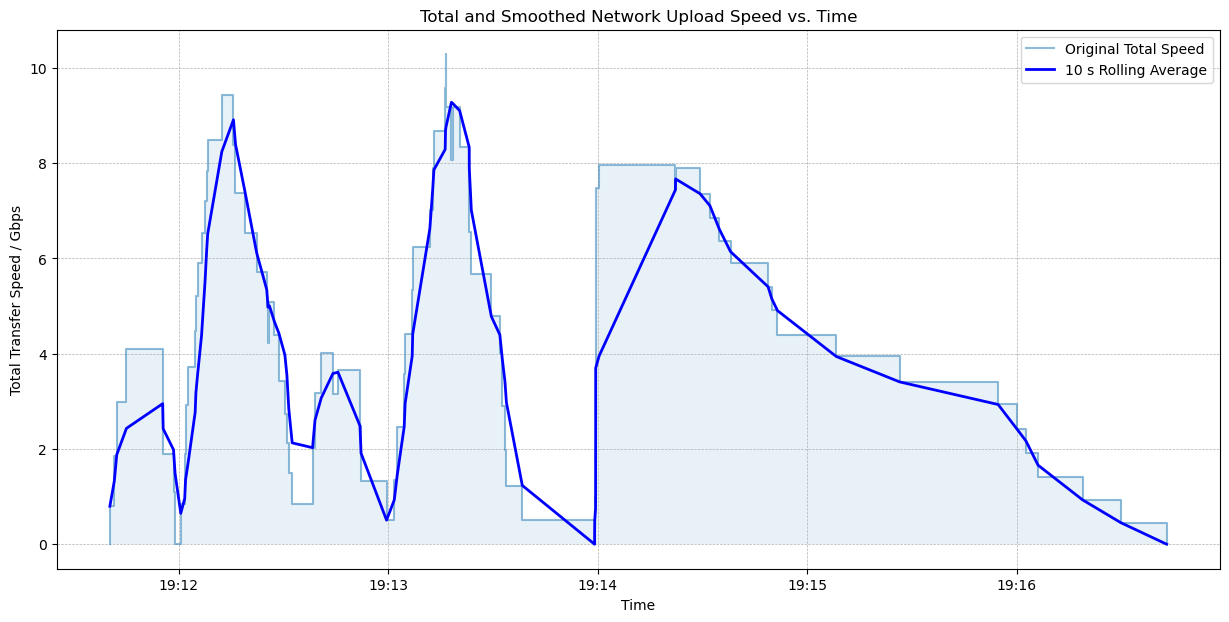

In [173]:
# --- 6. Plot Smoothed Throughput Over Time ---

# Import the necessary formatter from matplotlib
from matplotlib.dates import DateFormatter

# To perform a time-based rolling average, we first set the 'time' column as the index.
events_indexed_by_time = events_df.set_index('time')

# Calculate the rolling mean over a 60-second window.
# This creates a new series with the smoothed transfer rate.
smoothed_rate = events_indexed_by_time['total_rate'].rolling('5s').mean()


# Plotting the original and smoothed data together
plt.figure(figsize=(15, 7))

# Plot the original, "spiky" step plot from the previous cell
plt.plot(plot_times, plot_rates, label='Original Total Speed', alpha=0.5)
plt.fill_between(plot_times, plot_rates, alpha=0.1)

# Plot the new smoothed data
plt.plot(smoothed_rate.index, smoothed_rate.values, label='10 s Rolling Average', color='blue', linewidth=2)

plt.title('Total and Smoothed Network Upload Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Transfer Speed / Gbps')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.xlim(events_df['time'].min()+pd.Timedelta(minutes=20), events_df['time'].max()+pd.Timedelta(minutes=10))
# plt.ylim(0, 40)
plt.legend()

# Get the current axes and set the x-axis formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.show()